In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
churn = pd.read_csv('TelcoChurn.csv')

## Preprocessing

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
#Let's convert Total Charges to a numerical column
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'],errors='coerce')

In [7]:
churn.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [8]:
churn[churn['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


We see there are 11 rows with missing values so let's try to remove them

In [9]:
churn.dropna(inplace=True)
churn = churn.drop(columns='customerID',axis=1)

In [10]:
churn.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

<Figure size 1440x720 with 0 Axes>

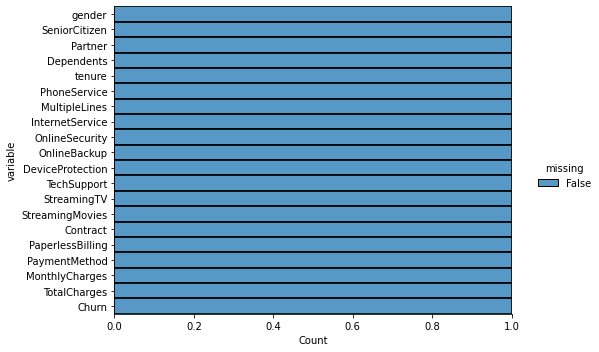

In [11]:
#Plot presence of NA values
plt.figure(figsize=(20,10))

sns.displot(
    data=churn.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.5
)

## Univariate Analysis

In [12]:
categorical_columns = list(churn.select_dtypes(include="object"))

In [13]:
categorical_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [15]:
def with_per(ax,total):
    for p in ax.patches:
        percentage = "{:.1f}%".format(p.get_height()/total*100)
        x = p.get_x() + p.get_width()-.15
        y = p.get_height()-1.5
        ax.annotate(percentage,(x,y),ha="center",fontsize=20,weight="bold")

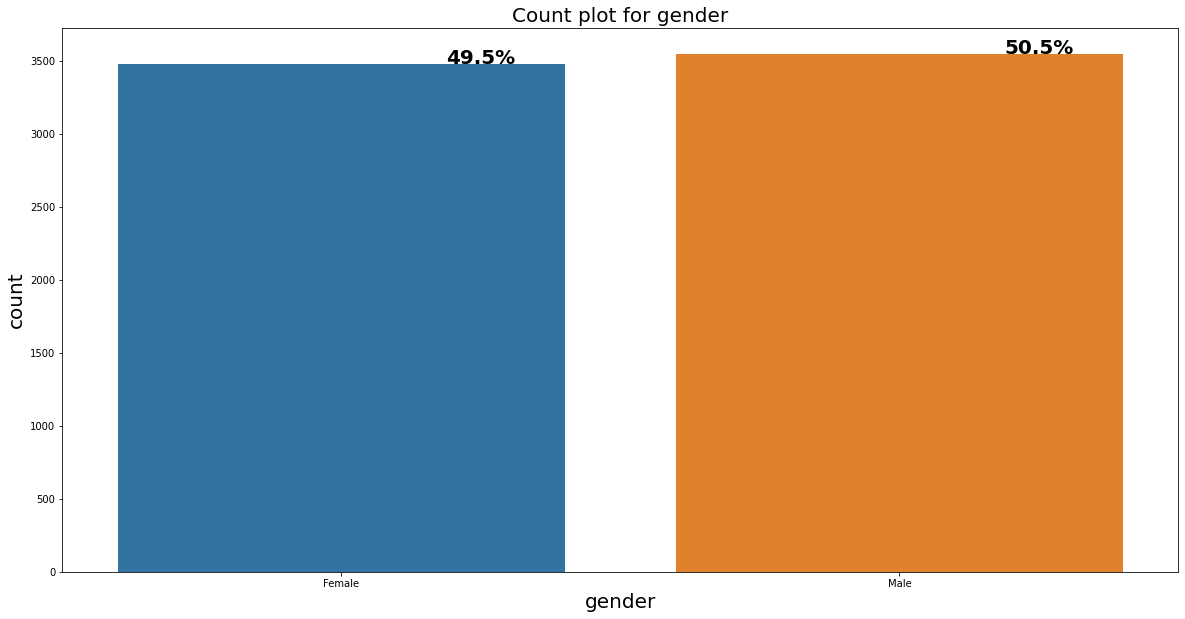

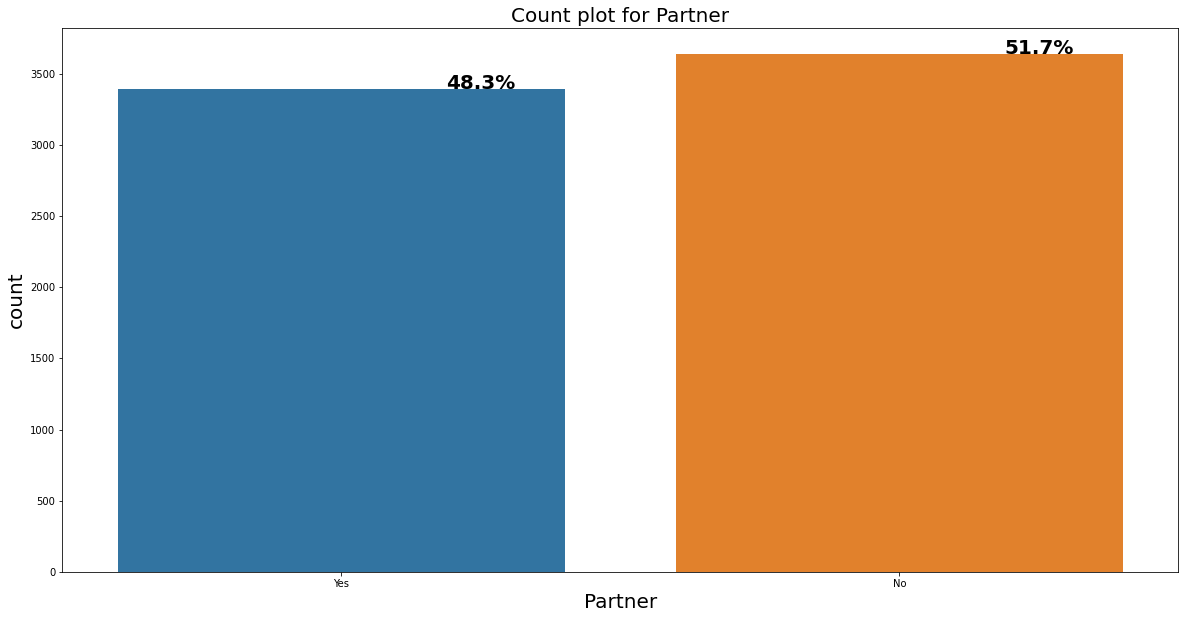

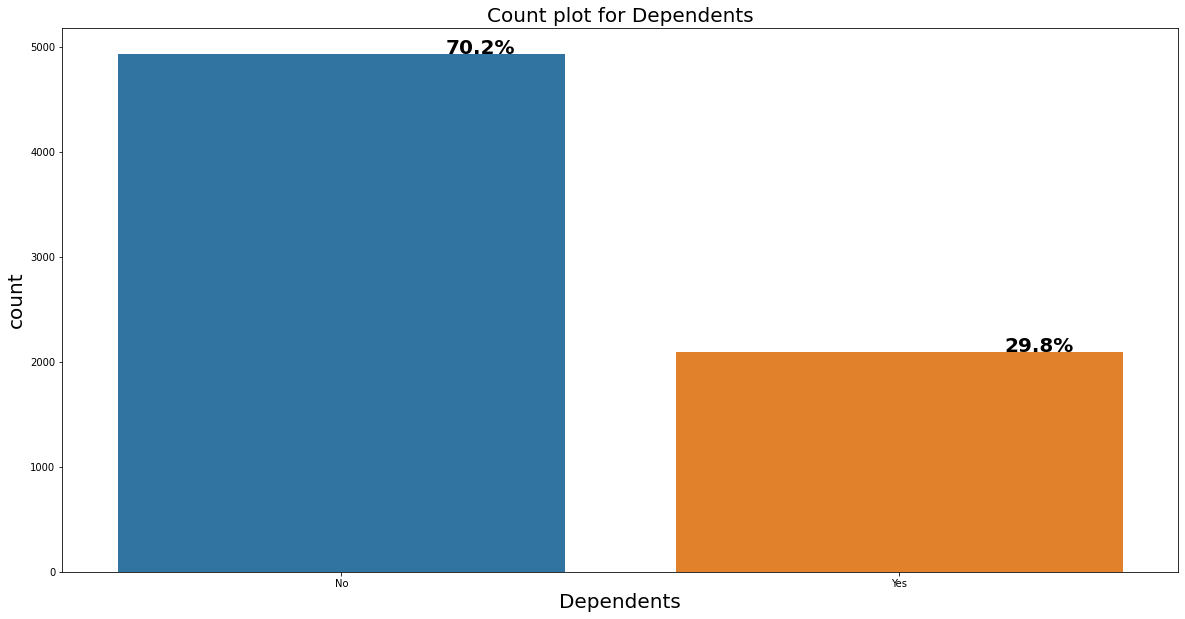

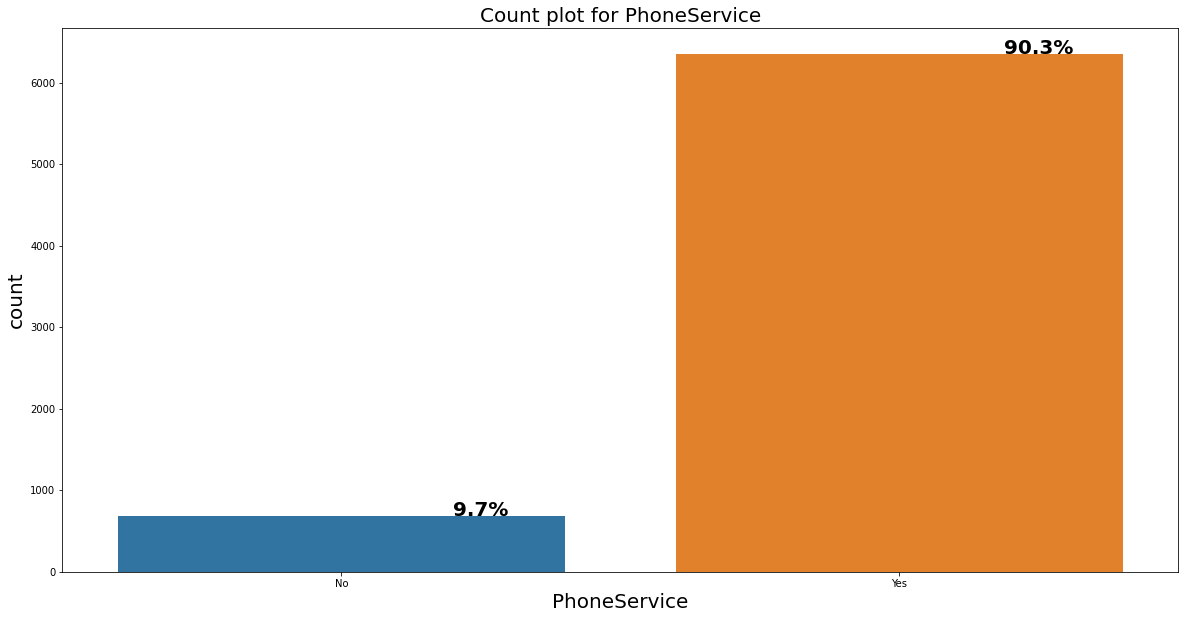

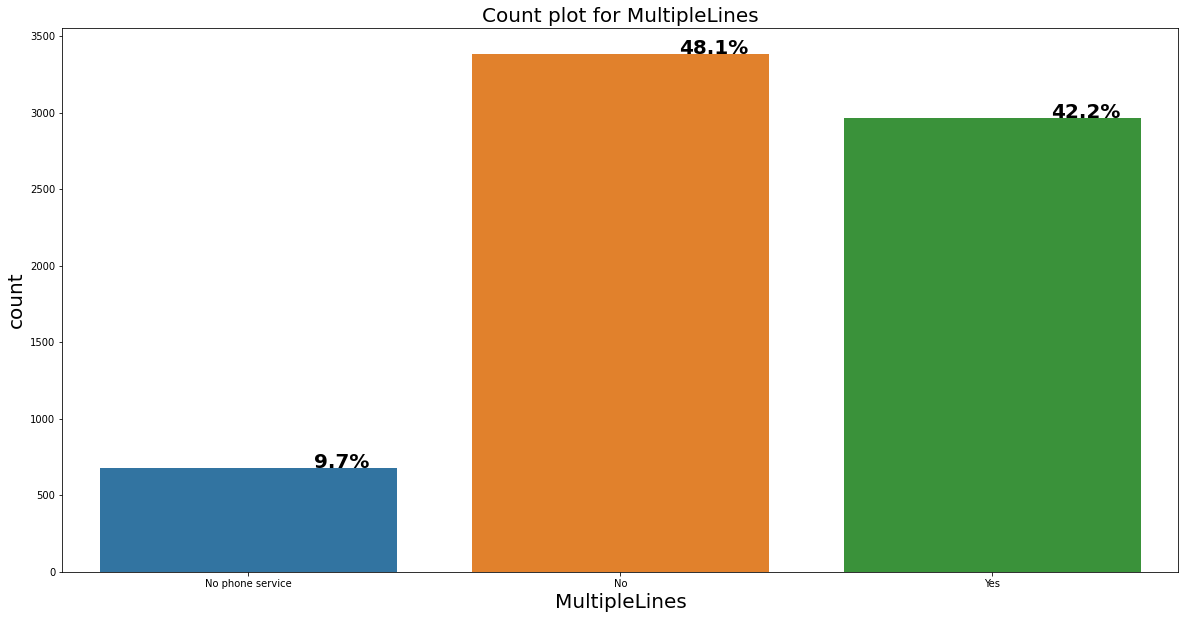

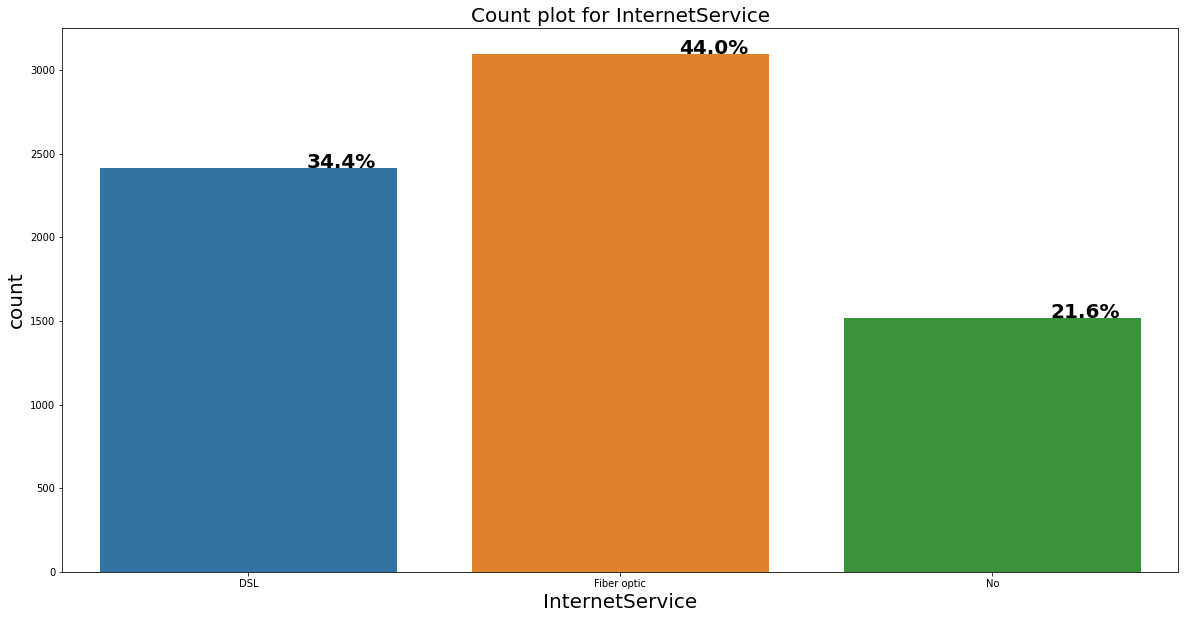

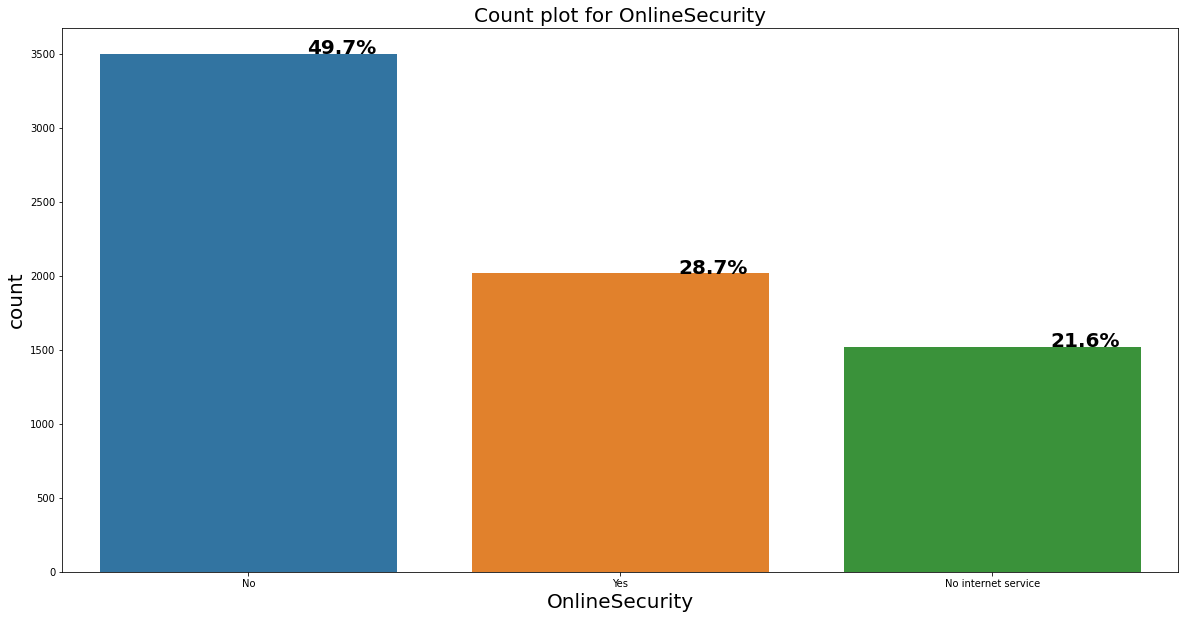

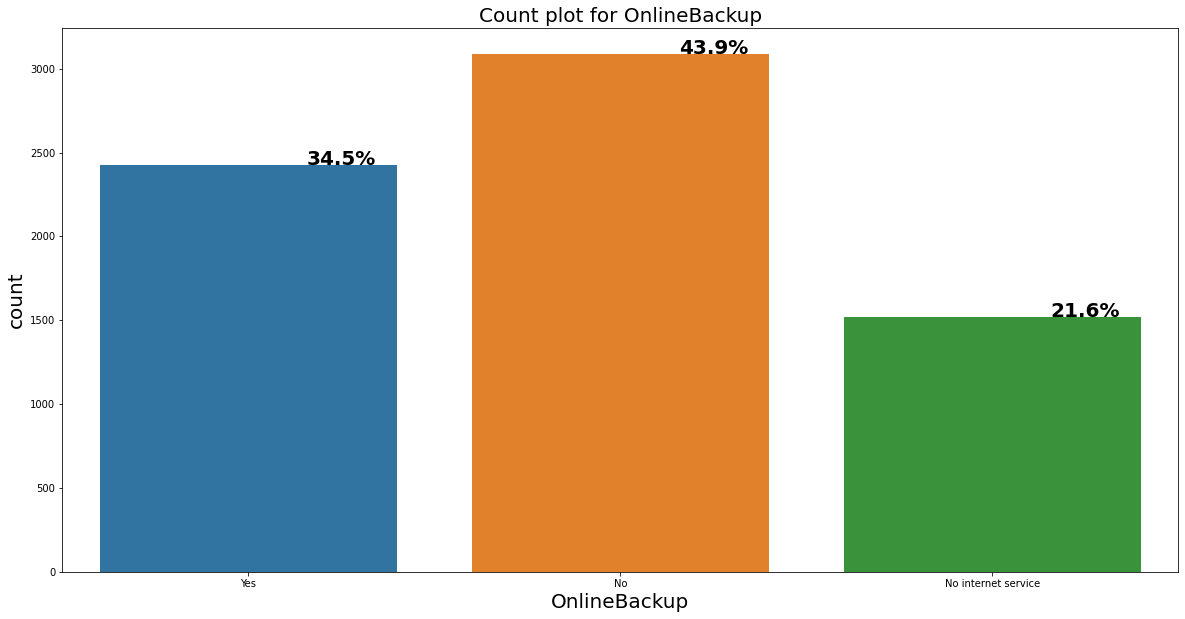

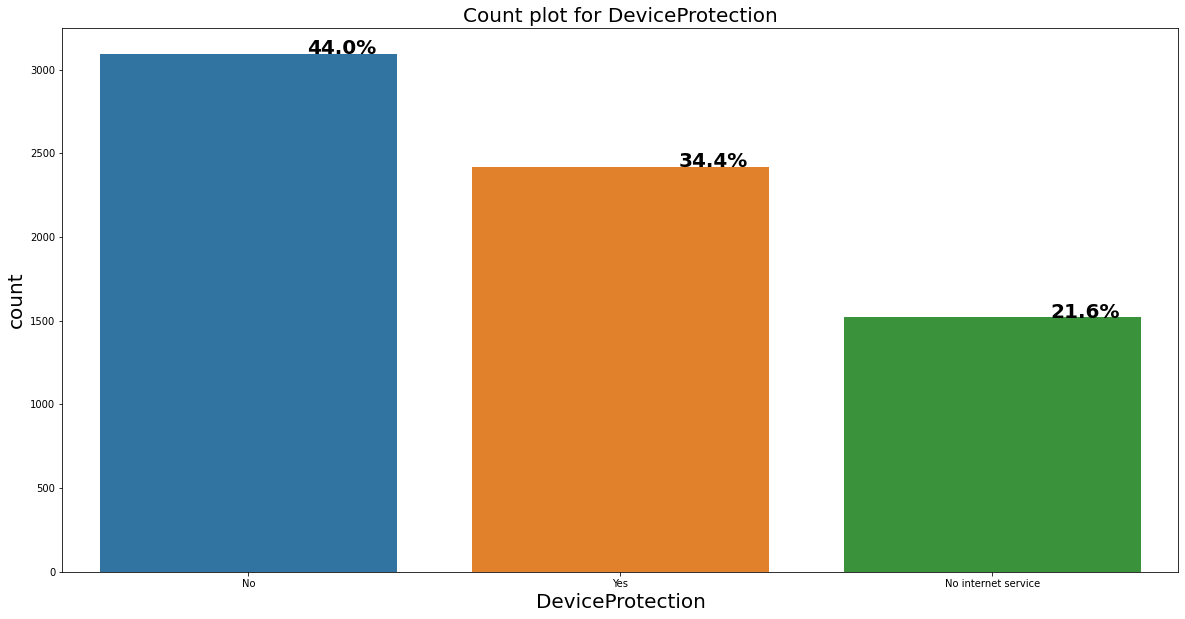

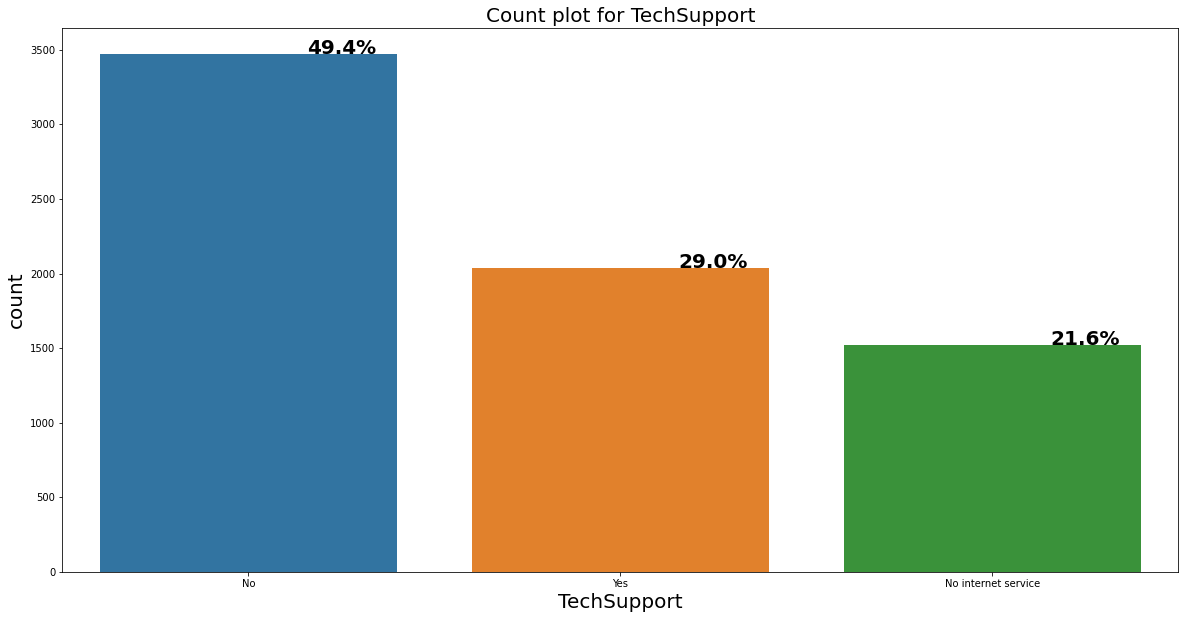

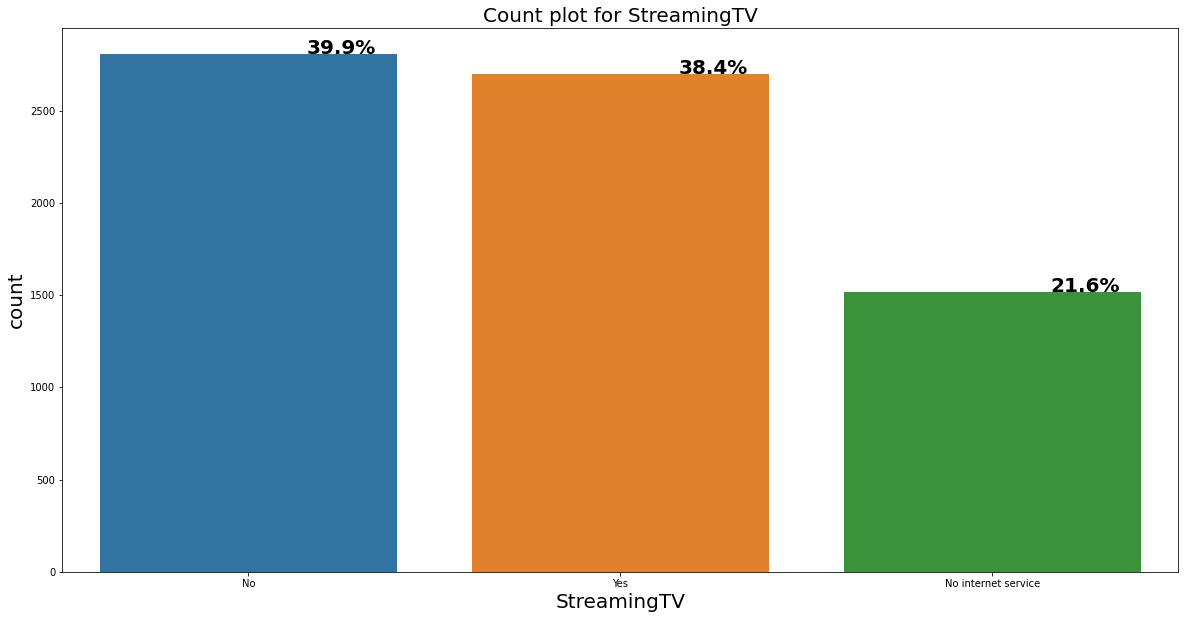

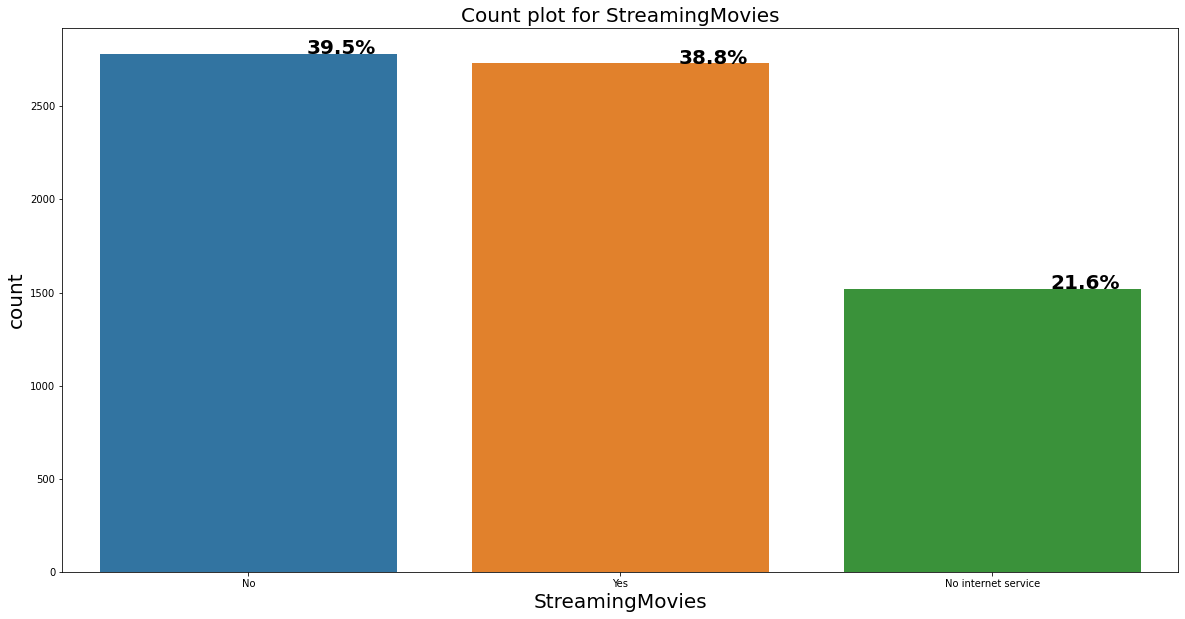

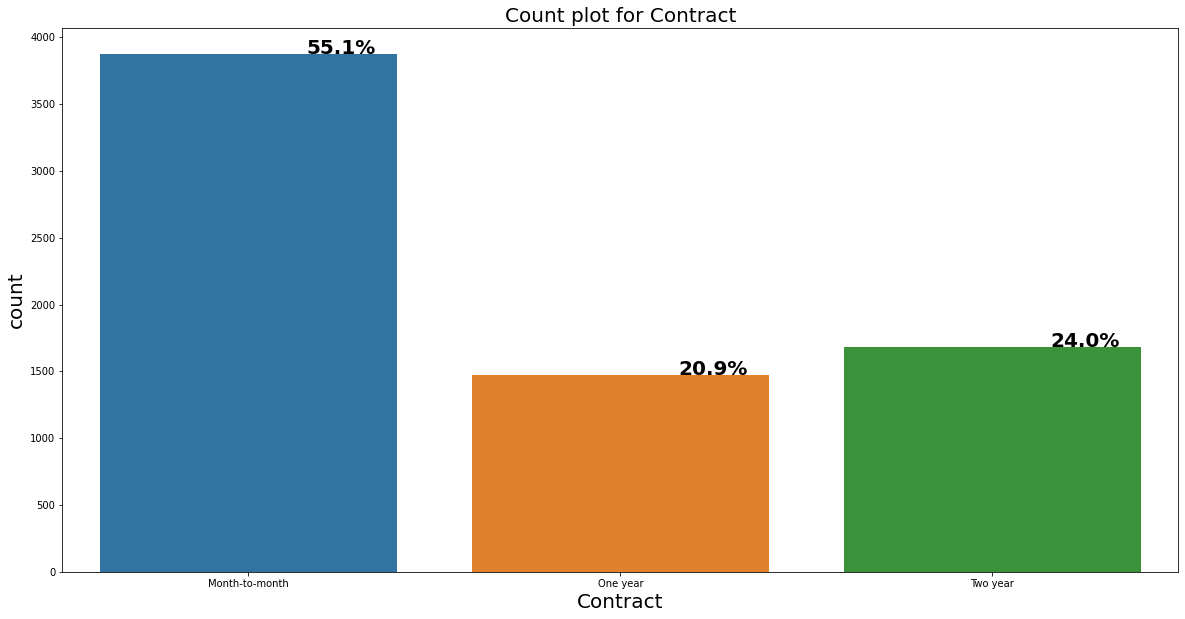

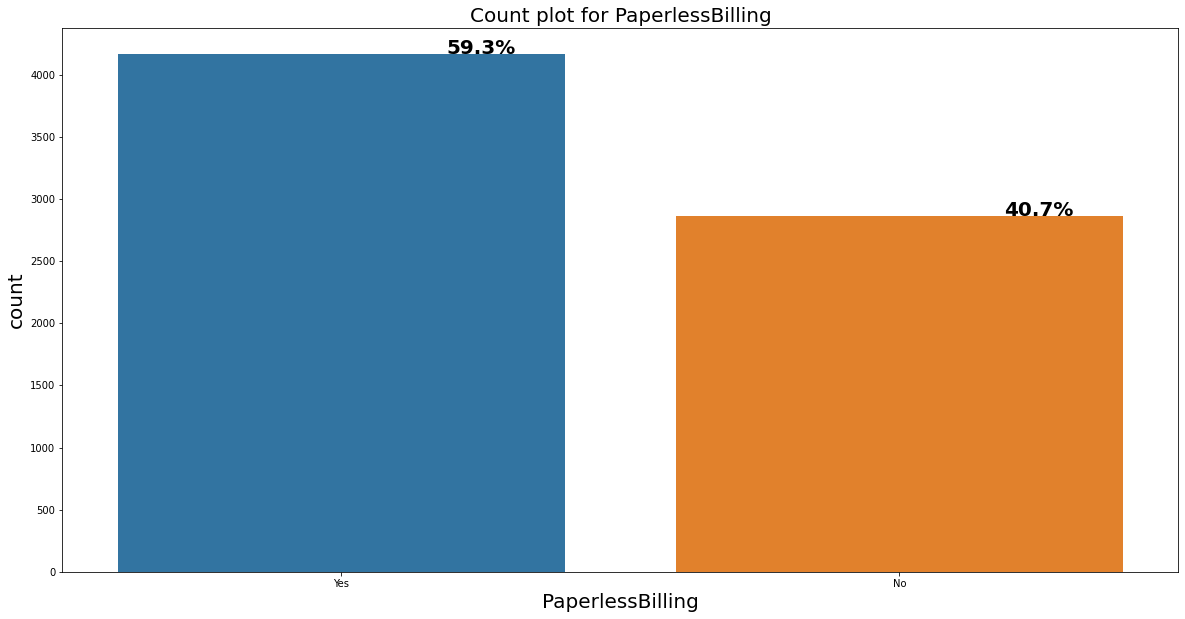

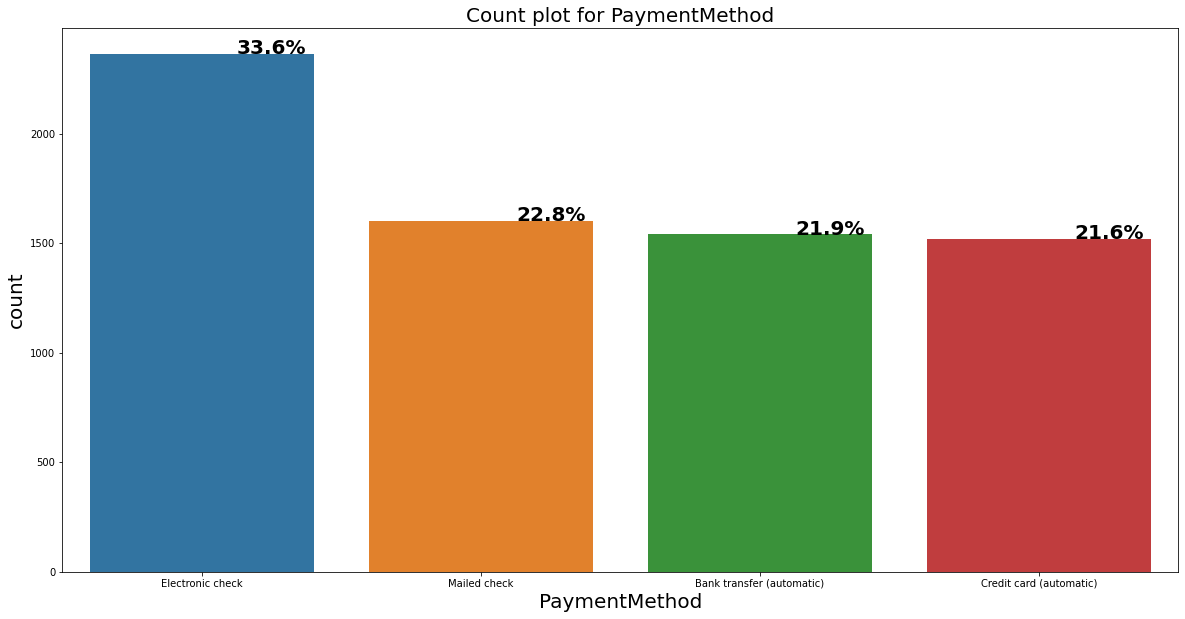

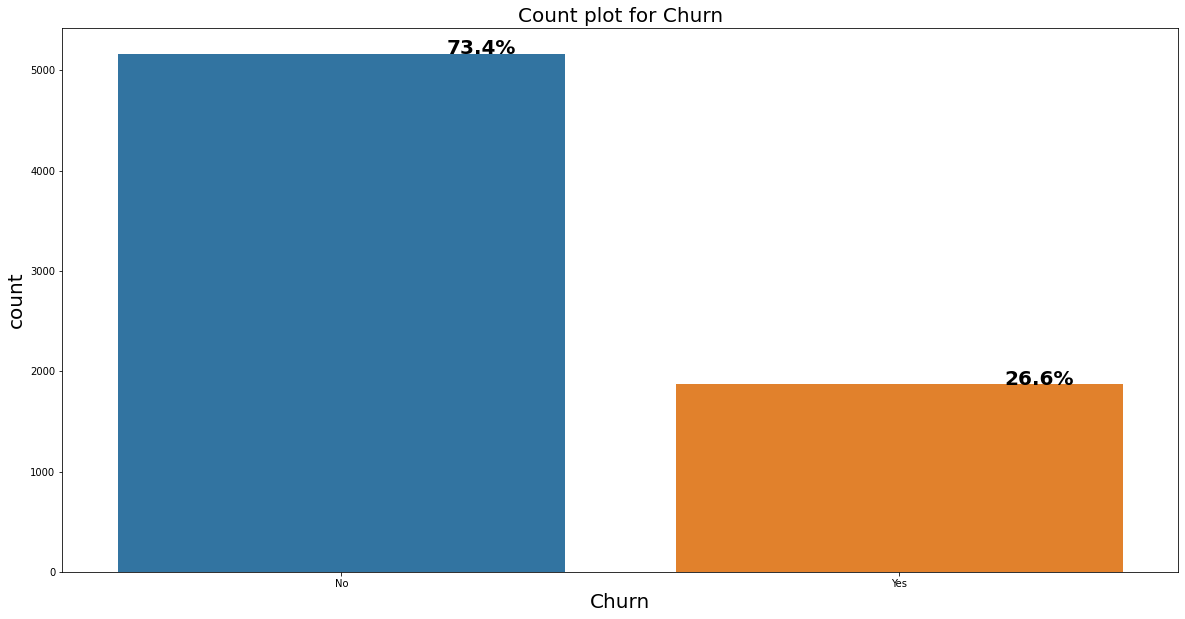

In [16]:
for i in categorical_columns:
    plt.figure(figsize=(20,10))
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plt.title('Count plot for {}'.format(i),fontsize=20)
    ax = sns.countplot(churn[i])
    with_per(ax,len(churn))
    plt.show()

Let's check the correlation amongst the variables

In [17]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
#Let's encode the variables to see 
churn['Churn'].replace(['Yes','No'],[1,0],inplace=True)

In [19]:
churn = pd.get_dummies(churn)

<AxesSubplot:>

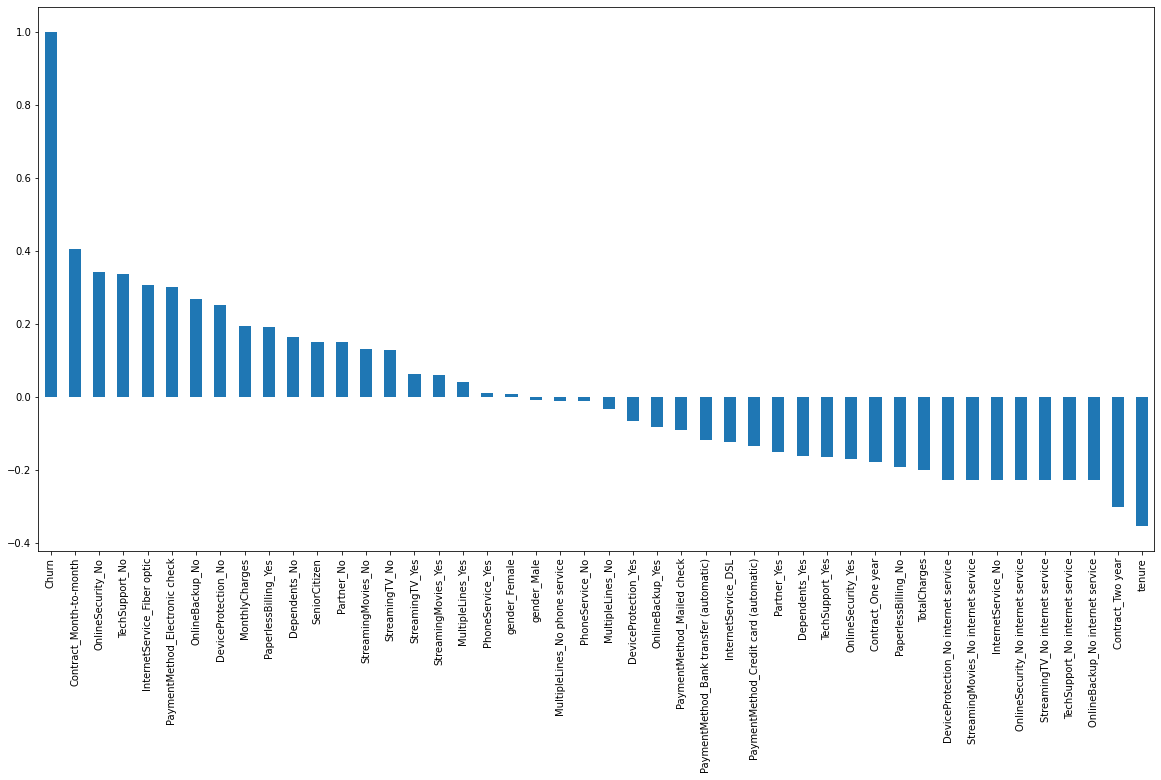

In [20]:
plt.figure(figsize=(20,10))
churn.corr()['Churn'].sort_values(ascending=False).plot(kind="bar")

* By the looks of it, month to month contract, online security number and tech support number are heavily correlated with customer churn while tenure, 2 year contract and no internet service are negatively correlated
* It makes sense in a way because people might be more prone to churn if they are on a monthly contract and with absense of security number, they might be customers who just wanted to ave a try of the service
* If people are on a tenure and on a 2 year contract, they are more likely to see through that without the loss of money, hence the negative relation with the churn

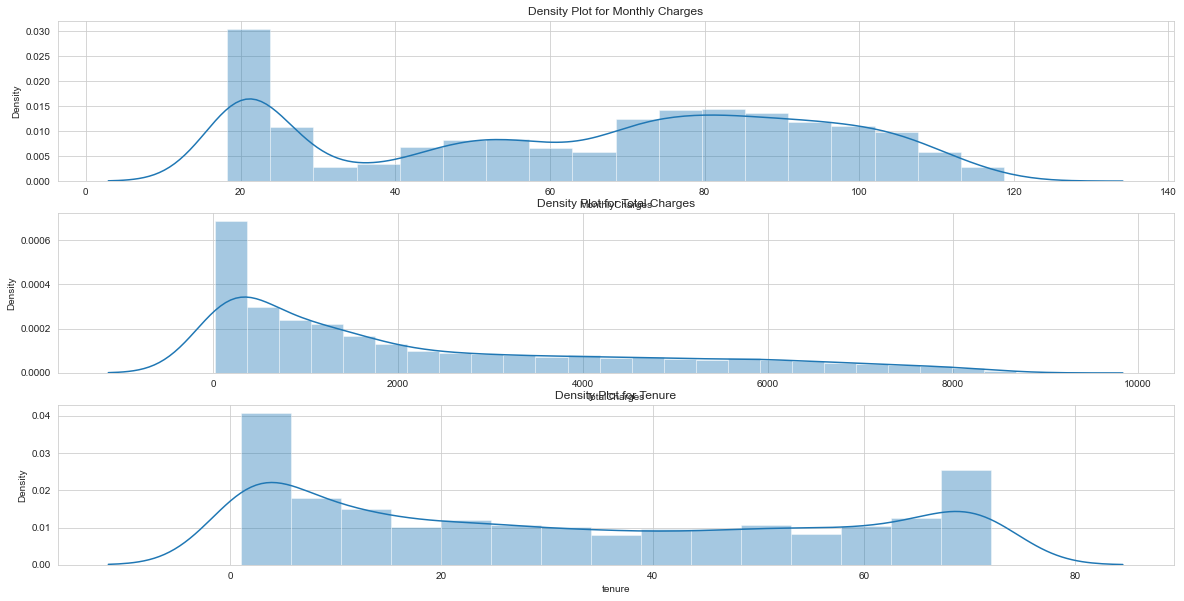

In [21]:
#Let's look at the distribution of monthly and total charges
sns.set_style("whitegrid")
fig,ax = plt.subplots(3,1,figsize=(20,10))
ax[0].set_title("Density Plot for Monthly Charges")
sns.distplot(churn['MonthlyCharges'],ax=ax[0] )
ax[1].set_title("Density Plot for Total Charges")
sns.distplot(churn['TotalCharges'],ax=ax[1])
ax[2].set_title("Density Plot for Tenure")
sns.distplot(churn['tenure'],ax=ax[2])
plt.show()

## Multivariate Analysis

In [22]:
churn.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


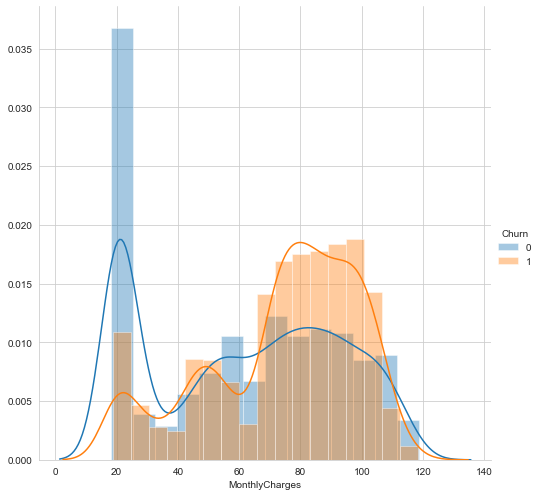

In [23]:
sns.FacetGrid(churn,hue='Churn',size=7).map(sns.distplot,'MonthlyCharges').add_legend()

It seems that churn is lower when monthly charges is low which makes sense

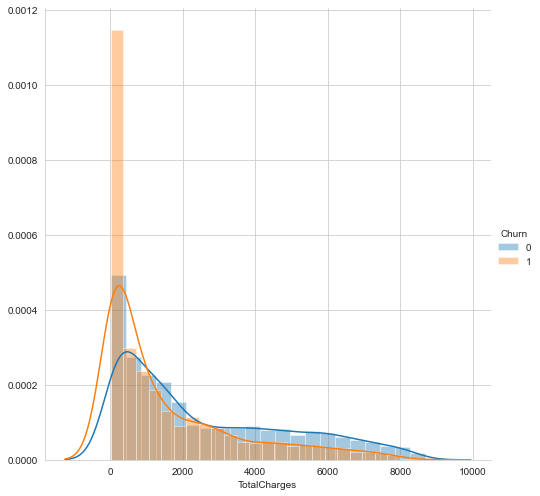

In [24]:
sns.FacetGrid(churn,hue='Churn',size=7).map(sns.distplot,'TotalCharges').add_legend()

Churn is lower when total charges are low

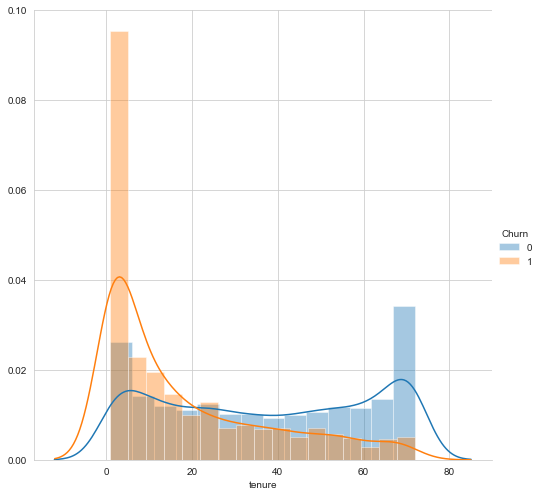

In [25]:
sns.FacetGrid(churn,hue='Churn',size=7).map(sns.distplot,'tenure').add_legend()

Churn is higher when tenure is lower which indicates people in long term contract are more prone to stay loyal

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

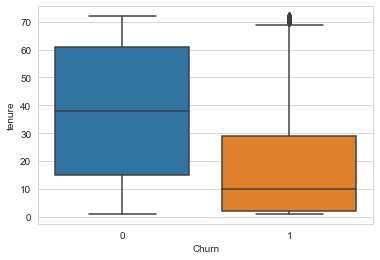

In [26]:
sns.boxplot(churn['Churn'],churn['tenure'])

Same info is represented in terms of boxplot

<Figure size 1440x720 with 0 Axes>

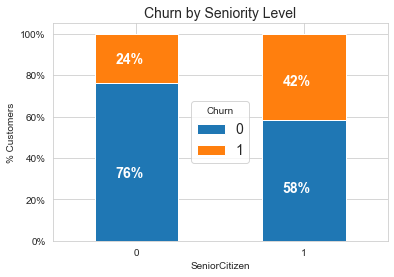

In [27]:
import matplotlib.ticker as mtick
plt.figure(figsize=(20,10))
seniority = churn.groupby(['SeniorCitizen','Churn']).size().unstack()
ax = (seniority.T/seniority.T.sum()*100).T.plot(kind="bar",stacked=True,rot=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Proportion of people who are prone to churn is almost double in senior citizens

Before creating the model, let's see the correlation of all variables apart from the churn to see if we can remove any similar columns

<AxesSubplot:>

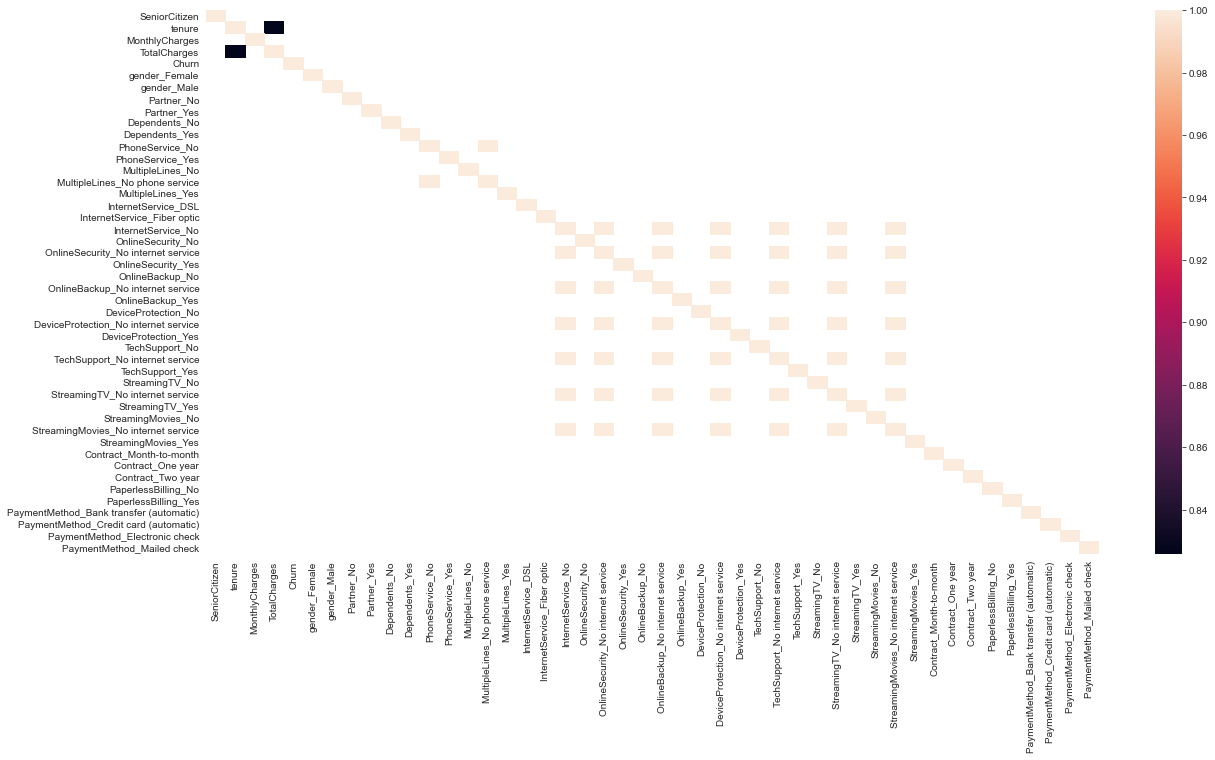

In [40]:
correlatedDf = churn.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlatedDf[correlatedDf>0.8])

We see that total and monthly charges are related to each other

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['features'] = churn.columns
vif_data['vif'] = [variance_inflation_factor(churn.values,i) for i in range(len(churn.columns))]

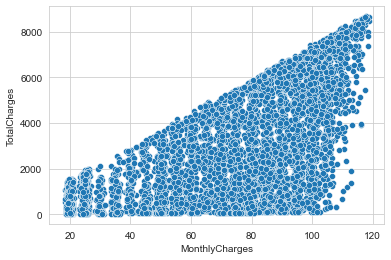

In [49]:
sns.scatterplot(churn['MonthlyCharges'],churn['TotalCharges'])
plt.show()


As can be seen from the plot and vif factor score, monthly charges and total charges are highly correlated, so we can remove one of them

In [50]:
churn = churn.drop(columns="MonthlyCharges")

## Let's create some models

We'll start with logistic regression

In [51]:
churn.head()

,SeniorCitizen,tenure,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


Always make it a point to scale the columns so that the proportion of values remains siilar

In [61]:
from sklearn.preprocessing import MinMaxScaler
y = churn['Churn']
x = churn.drop(columns='Churn')
sc = MinMaxScaler(feature_range=(0,1))
x_scaled = pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x_scaled.head()

,SeniorCitizen,tenure,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Let's split into train and test datasets

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,stratify=y,test_size=0.25,random_state = 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5274, 44)
(5274,)
(1758, 44)
(1758,)


<b> Let's start by fitting Logistic Regression Model <b>

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
log = LogisticRegression()
log_model = log.fit(x_train,y_train)
log_pred = log_model.predict(x_test)
print(metrics.accuracy_score(y_test,log_pred))

0.8026166097838453


In imbalanced dataset, ideally we should look at the roc auc score

In [140]:
log_proba = log_model.predict_proba(x_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,log_proba)

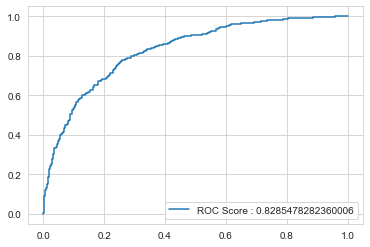

In [141]:
log_reg_auc = metrics.roc_auc_score(y_test,log_proba)
plt.plot(fpr,tpr,label="ROC Score : "+str(log_reg_auc))
plt.legend()
plt.show()

Get Important features of the model

<AxesSubplot:>

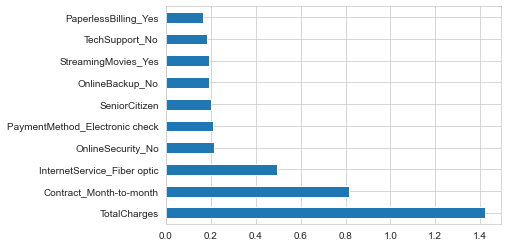

In [86]:
weights = pd.Series(log_model.coef_[0],index = x.columns)
weights.sort_values(ascending=False)[:10].plot(kind="barh")

<b> Next model to test is Random Forest <b>

We'll use hyperparameter tuning to arrive at the best possible combo

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[10,50,100,500,1000,2000],
         'bootstrap':[True],
         'max_depth':[50,70,100],
         'max_features':[2,3],
          'min_samples_split':[5,7]
         }
rfc = RandomForestClassifier()

grid = GridSearchCV(estimator=rfc,param_grid=params,cv=5,n_jobs=-1,verbose=0)

In [91]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [50, 70, 100],
                         'max_features': [2, 3], 'min_samples_split': [5, 7],
                         'n_estimators': [10, 50, 100, 500, 1000, 2000]})

In [92]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_split': 7,
 'n_estimators': 500}

In [98]:
grid.best_estimator_

RandomForestClassifier(max_depth=100, max_features=3, min_samples_split=7,
                       n_estimators=500)

In [99]:
rfc_pred = grid.best_estimator_.predict(x_test)

In [108]:
print(metrics.accuracy_score(y_test, rfc_pred))

0.7963594994311718


In [159]:
print(metrics.classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1291
           1       0.66      0.48      0.55       467

    accuracy                           0.80      1758
   macro avg       0.75      0.69      0.71      1758
weighted avg       0.78      0.80      0.78      1758



In [118]:
print(metrics.confusion_matrix(y_test,rfc_pred))

[[1177  114]
 [ 244  223]]


Let's check the roc auc score for the model

In [129]:
rfc_model = grid.best_estimator_
rfc_model.fit(x_train,y_train)
rfc_proba = rfc_model.predict_proba(x_test)[::,1]

In [133]:
fpr,tpr,_ = metrics.roc_curve(y_test,rfc_proba)
auc = metrics.roc_auc_score(y_test,rfc_proba)

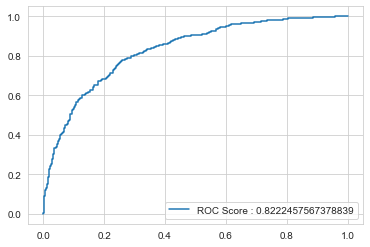

In [142]:
plt.plot(fpr,tpr,label = "ROC Score : " + str(auc))
plt.legend(loc="best")
plt.show()

Let's check the SVM model

In [149]:
from sklearn.svm import SVC

svm = SVC(kernel="linear",probability=True)
svm_model = svm.fit(x_train,y_train)
y_svm = svm_model.predict(x_test)
print(metrics.accuracy_score(y_test,y_svm))

0.7946530147895335


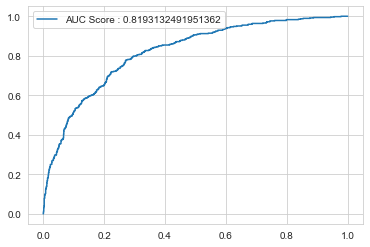

In [155]:
y_svm_proba = svm_model.predict_proba(x_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_svm_proba)
svm_auc = metrics.roc_auc_score(y_test,y_svm_proba)
plt.plot(fpr,tpr,label="AUC Score : "+str(svm_auc))
plt.legend(loc="best")
plt.show()

In [158]:
print(metrics.confusion_matrix(y_test,y_svm))

[[1146  145]
 [ 216  251]]


In [160]:
print(metrics.classification_report(y_test,y_svm))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1291
           1       0.63      0.54      0.58       467

    accuracy                           0.79      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.79      0.79      1758



<b> FInally let's try XGBoost Model <b>

In [161]:
from xgboost import XGBClassifier

In [162]:
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train,y_train)
y_xgb = xgb_model.predict(x_test)
print(metrics.accuracy_score(y_test,y_xgb))

0.7849829351535836


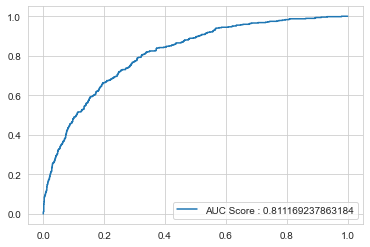

In [163]:
y_xgb_proba = xgb_model.predict_proba(x_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_xgb_proba)
xgb_auc = metrics.roc_auc_score(y_test,y_xgb_proba)
plt.plot(fpr,tpr,label="AUC Score : "+str(xgb_auc))
plt.legend(loc="best")
plt.show()